# <b> Train transaction
## 1. Threshold (when missing values are more than 90%)
## 2. Convert Float64, Int 64
## 3. Find categorical columns, Convert categorical values to numerical values
## (For email column, Find top 5 then covert to 1~5, others to 6) Fill missing values for categorical columns
## 4. Fill missing values for numerical columns

In [3]:
import numpy as np   # import numpy
import pandas as pd  # import pandas
import os
import gc   # for gabage collection
import seaborn as sns  # data visualization lib
import matplotlib.pyplot as plt
import glob
#from tqdm import tqdm
%matplotlib inline

In [4]:
DATA_PATH = r'C:\Users\YAE WEON SHIM\CEBD 1260'

In [5]:
file_name = os.path.join(DATA_PATH,r'train_transaction.csv')
file_name

'C:\\Users\\YAE WEON SHIM\\CEBD 1260\\train_transaction.csv'

In [6]:
df= pd.read_csv(file_name)

In [7]:
df.shape

(590540, 394)

In [7]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [9]:
# To detect missing values
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [10]:
nan_info = pd.DataFrame(df.isnull().sum()).reset_index()
nan_info.columns = ['feature_name','nan_cnt']
nan_info.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info['nan_percentage'] = nan_info['nan_cnt']/len(df)
nan_info

,feature_name,nan_cnt,nan_percentage
14,dist2,552913,0.936284
37,D7,551623,0.934099
43,D13,528588,0.895093
44,D14,528353,0.894695
42,D12,525823,0.890410
...,...,...,...
17,C1,0,0.000000
18,C2,0,0.000000
30,C14,0,0.000000
1,isFraud,0,0.000000


In [11]:
df['dist2'].head()
df['dist2'].isnull().sum()

552913

In [12]:
nan_info.head()

,feature_name,nan_cnt,nan_percentage
14,dist2,552913,0.936284
37,D7,551623,0.934099
43,D13,528588,0.895093
44,D14,528353,0.894695
42,D12,525823,0.890410


In [13]:
cols_with_missing = nan_info.loc[nan_info.nan_cnt>0].feature_name.values
cols_with_missing

array(['dist2', 'D7', 'D13', 'D14', 'D12', 'D6', 'D9', 'D8', 'V153',
       'V139', 'V162', 'V161', 'V154', 'V138', 'V158', 'V157', 'V163',
       'V156', 'V155', 'V149', 'V148', 'V147', 'V146', 'V142', 'V141',
       'V140', 'V151', 'V152', 'V145', 'V144', 'V150', 'V143', 'V160',
       'V166', 'V164', 'V159', 'V165', 'V322', 'V332', 'V338', 'V337',
       'V336', 'V335', 'V334', 'V333', 'V331', 'V323', 'V330', 'V328',
       'V327', 'V326', 'V325', 'V324', 'V329', 'V339', 'V240', 'V235',
       'V252', 'V249', 'V248', 'V247', 'V246', 'V244', 'V243', 'V242',
       'V241', 'V237', 'V236', 'V233', 'V254', 'V232', 'V231', 'V230',
       'V229', 'V228', 'V217', 'V226', 'V225', 'V224', 'V223', 'V218',
       'V253', 'V219', 'V266', 'V262', 'V268', 'V267', 'V273', 'V274',
       'V275', 'V276', 'V265', 'V264', 'V263', 'V277', 'V261', 'V260',
       'V278', 'V258', 'V257', 'V269', 'R_emaildomain', 'V203', 'V196',
       'V202', 'V207', 'V204', 'V216', 'V206', 'V215', 'V214', 'V213',
       

In [14]:
len(cols_with_missing)

374

In [15]:
df = df.loc[:, df.isnull().mean() < .9]

In [16]:
df 
#394 columns has been decreased to 339 columns 

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#check dtypes for each columns
df.dtypes
#There are many float 64 and int 64

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 392, dtype: object

In [18]:
#change data type function
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [19]:
mem_use = df.memory_usage().sum() / 1024**3 
print('Memory usage of dataframe is {:.6f} GB'.format(mem_use))

#dataframe memory usage has been decreased

Memory usage of dataframe is 1.724748 GB


In [20]:
y = df['isFraud'].values
features = [f for f in df.columns.values if f not in ['isFraud']] # you have to customize this according to your own needs
print(features)

['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 

In [21]:
#Find the categorical values
cat_features = []
for f in features:
    if str(df[f].dtype) == 'object':
        cat_features.append(f)
print(cat_features)

#card 1~6 are also categorical values.

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [22]:
#Now, change categorical values to numerical values.
#check unique value
df['ProductCD'].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [23]:
df['card1'].unique()

array([13926,  2755,  4663, ..., 13166,  8767, 18038], dtype=int64)

In [24]:
df['card1'].fillna('unknown',inplace=True)

In [25]:
df['card2'].unique()

array([ nan, 404., 490., 567., 514., 555., 360., 100., 111., 352., 375.,
       418., 303., 314., 543., 583., 148., 321., 269., 361., 272., 399.,
       569., 453., 417., 512., 545., 266., 114., 481., 452., 547., 383.,
       170., 343., 556., 285., 562., 302., 264., 558., 500., 396., 103.,
       206., 143., 243., 476., 199., 174., 423., 446., 492., 523., 440.,
       528., 161., 535., 354., 117., 455., 325., 158., 268., 122., 479.,
       147., 215., 480., 265., 388., 408., 309., 415., 414., 437., 104.,
       225., 101., 134., 586., 191., 491., 369., 322., 494., 532., 313.,
       474., 324., 475., 298., 429., 432., 553., 566., 599., 296., 251.,
       310., 242., 204., 250., 270., 346., 316., 194., 587., 390., 135.,
       536., 254., 226., 327., 420., 260., 413., 428., 561., 387., 411.,
       392., 203., 297., 136., 276., 142., 527., 210., 184., 459., 118.,
       585., 106., 588., 449., 176., 177., 246., 439., 503., 445., 172.,
       468., 239., 496., 364., 533., 370., 578., 15

In [26]:
df['card2'].fillna('unknown',inplace=True)

In [27]:
df['card3'].unique()

array([150., 117., 185., 143., 144., 163., 146., 191., 162., 119., 147.,
       100., 135., 137., 138., 102., 213., 106., 214., 148., 210., 203.,
       194., 141., 225.,  nan, 188., 193., 208., 133., 223., 134., 153.,
       131., 200., 149., 116., 222., 220., 197., 129., 206., 195., 204.,
       127., 142., 111., 159., 118., 229., 217., 212., 227., 166., 189.,
       120., 171., 190., 105., 130., 170., 180., 177., 132., 109., 198.,
       121., 183., 215., 156., 207., 186., 167., 152., 199., 219., 202.,
       126., 182., 123., 107., 221., 124., 231., 157., 136., 128., 168.,
       101., 108., 125., 211., 164., 160., 161., 179., 155., 169., 205.,
       209., 226., 174., 176., 181., 224., 122., 201., 175., 139., 172.,
       114., 228., 184., 151., 173.])

In [28]:
df['card3'].fillna('unknown',inplace=True)

In [29]:
df['card3'].unique()

array([150.0, 117.0, 185.0, 143.0, 144.0, 163.0, 146.0, 191.0, 162.0,
       119.0, 147.0, 100.0, 135.0, 137.0, 138.0, 102.0, 213.0, 106.0,
       214.0, 148.0, 210.0, 203.0, 194.0, 141.0, 225.0, 'unknown', 188.0,
       193.0, 208.0, 133.0, 223.0, 134.0, 153.0, 131.0, 200.0, 149.0,
       116.0, 222.0, 220.0, 197.0, 129.0, 206.0, 195.0, 204.0, 127.0,
       142.0, 111.0, 159.0, 118.0, 229.0, 217.0, 212.0, 227.0, 166.0,
       189.0, 120.0, 171.0, 190.0, 105.0, 130.0, 170.0, 180.0, 177.0,
       132.0, 109.0, 198.0, 121.0, 183.0, 215.0, 156.0, 207.0, 186.0,
       167.0, 152.0, 199.0, 219.0, 202.0, 126.0, 182.0, 123.0, 107.0,
       221.0, 124.0, 231.0, 157.0, 136.0, 128.0, 168.0, 101.0, 108.0,
       125.0, 211.0, 164.0, 160.0, 161.0, 179.0, 155.0, 169.0, 205.0,
       209.0, 226.0, 174.0, 176.0, 181.0, 224.0, 122.0, 201.0, 175.0,
       139.0, 172.0, 114.0, 228.0, 184.0, 151.0, 173.0], dtype=object)

In [30]:
df['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

In [31]:
df['card4'].fillna('unknown',inplace=True)

In [32]:
df['card5'].unique()

array([142., 102., 166., 117., 226., 224., 134., 219., 137., 195., 138.,
       100., 147., 162., 202., 118., 150., 183., 171., 236., 197., 133.,
       223., 149., 228., 229.,  nan, 198., 182., 126., 185., 190., 131.,
       144., 141., 215., 203., 237., 132., 143., 146., 140., 129., 199.,
       194., 213., 111., 169., 177., 173., 156., 119., 135., 107., 232.,
       188., 159., 127., 148., 139., 104., 210., 180., 207., 204., 212.,
       106., 152., 222., 187., 200., 214., 189., 181., 206., 225., 157.,
       121., 217., 184., 167., 113., 136., 120., 201., 211., 122., 164.,
       123., 145., 172., 114., 231., 105., 221., 234., 130., 109., 196.,
       101., 158., 230., 128., 191., 165., 115., 233., 216., 116., 178.,
       125., 163., 205., 112., 168., 209., 235., 151., 175., 160.])

In [33]:
df['card6'].unique()

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

In [34]:
df['card6'] = df['card6'].replace(['debit or credit','charge card'],'debit')

In [35]:
df['card6'].unique()

array(['credit', 'debit', nan], dtype=object)

In [36]:
df['card5'].fillna('unknown',inplace=True)

In [37]:
df['card6'].fillna('unknown',inplace=True)

In [38]:
df['addr1'].unique()
df['addr1'].fillna('unknown',inplace=True)   

In [39]:
df['addr2'].unique()
df['addr2'].fillna('unknown',inplace=True)  

In [40]:
#P_emaildomain

In [41]:
df['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [42]:
df['P_emaildomain'] = df['P_emaildomain'].replace(['yahoo.com.mx'],'yahoo.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['yahoo.fr'],'yahoo.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['yahoo.de'],'yahoo.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['yahoo.es'],'yahoo.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['yahoo.co.uk'],'yahoo.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['yahoo.co.jp'],'yahoo.com')

In [43]:
df['P_emaildomain'] = df['P_emaildomain'].replace(['hotmail.es'],'hotmail.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['hotmail.fr'],'hotmail.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['hotmail.de'],'hotmail.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['hotmail.co.uk'],'hotmail.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['ive.com.mx'],'live.com')
df['P_emaildomain'] = df['P_emaildomain'].replace(['live.fr'],'live.com') 
df['P_emaildomain'] = df['P_emaildomain'].replace(['netzero.net'],'netzero.com')

In [44]:
df['P_emaildomain'].fillna('unknown',inplace=True)

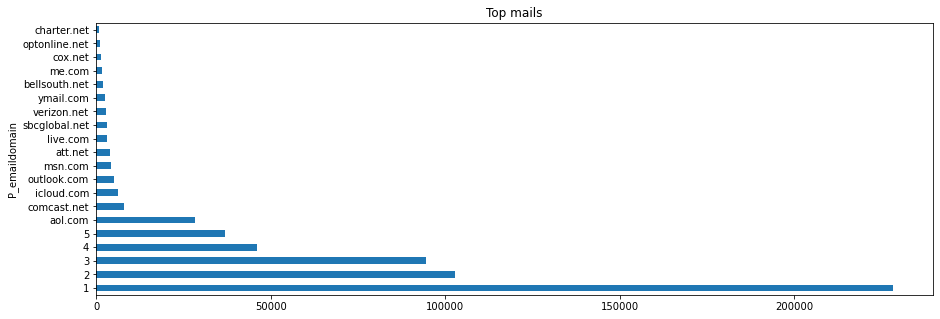

In [47]:
df.groupby('P_emaildomain') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top mails')
plt.show()

In [48]:
df['P_emaildomain'] = df['P_emaildomain'].replace(['gmail.com'],1)
df['P_emaildomain'] = df['P_emaildomain'].replace(['yahoo.com'],2)
df['P_emaildomain'] = df['P_emaildomain'].replace(['unknown'],3)
df['P_emaildomain'] = df['P_emaildomain'].replace(['hotmail.com'],4)
df['P_emaildomain'] = df['P_emaildomain'].replace(['anonymous.com'],5)

In [49]:
df['P_emaildomain'].unique()

array([3, 1, 'outlook.com', 2, 'mail.com', 5, 4, 'verizon.net', 'aol.com',
       'me.com', 'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'centurylink.net', 'servicios-ta.com', 'earthlink.net',
       'cfl.rr.com', 'roadrunner.com', 'netzero.com', 'gmx.de',
       'suddenlink.net', 'frontiernet.net', 'windstream.net',
       'frontier.com', 'outlook.es', 'mac.com', 'aim.com', 'web.de',
       'twc.com', 'cableone.net', 'sc.rr.com', 'ptd.net',
       'protonmail.com'], dtype=object)

In [50]:
df['P_emaildomain'] = np.where(df['P_emaildomain'].isin([1,2,3,4,5]), df['P_emaildomain'], 6)

In [51]:
df['R_emaildomain'] = df['R_emaildomain'].replace(['outlook.com', 'mail.com', 'verizon.net', 'aol.com',
       'me.com', 'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'centurylink.net', 'servicios-ta.com', 'earthlink.net',
       'cfl.rr.com', 'roadrunner.com', 'netzero.com', 'gmx.de',
       'suddenlink.net', 'frontiernet.net', 'windstream.net',
       'frontier.com', 'outlook.es', 'mac.com', 'aim.com', 'web.de',
       'twc.com', 'cableone.net', 'sc.rr.com', 'ptd.net',
       'protonmail.com'],6)

In [52]:
df['P_emaildomain'].unique()

array([3, 1, 6, 2, 5, 4], dtype=object)

In [53]:
df['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 6, 'anonymous.com', 'yahoo.com',
       'yahoo.com.mx', 'hotmail.es', 'scranton.edu', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'live.fr', 'yahoo.co.uk', 'hotmail.fr',
       'hotmail.de', 'hotmail.co.uk', 'netzero.net', 'yahoo.co.jp'],
      dtype=object)

In [54]:
#R_emaildomain

In [55]:
df['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 6, 'anonymous.com', 'yahoo.com',
       'yahoo.com.mx', 'hotmail.es', 'scranton.edu', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'live.fr', 'yahoo.co.uk', 'hotmail.fr',
       'hotmail.de', 'hotmail.co.uk', 'netzero.net', 'yahoo.co.jp'],
      dtype=object)

In [56]:
# replace all emails by yahoo.com
df['R_emaildomain'] = df['R_emaildomain'].replace(['yahoo.com.mx'],'yahoo.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['yahoo.fr'],'yahoo.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['yahoo.de'],'yahoo.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['yahoo.es'],'yahoo.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['yahoo.co.uk'],'yahoo.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['yahoo.co.jp'],'yahoo.com')


In [57]:
# replace other values.
df['R_emaildomain'] = df['R_emaildomain'].replace(['hotmail.es'],'hotmail.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['hotmail.fr'],'hotmail.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['hotmail.de'],'hotmail.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['hotmail.co.uk'],'hotmail.com')

df['R_emaildomain'] = df['R_emaildomain'].replace(['outlook.es'],'outlook.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['netzero.net'],'netzero.com')
                                            
df['R_emaildomain'] = df['R_emaildomain'].replace(['ive.com.mx'],'live.com')
df['R_emaildomain'] = df['R_emaildomain'].replace(['live.fr'],'live.com')                                                  

In [58]:
df['R_emaildomain'].fillna('unknown',inplace=True) # fill missing values

In [59]:
df['R_emaildomain'].unique()

array(['unknown', 'gmail.com', 'hotmail.com', 6, 'anonymous.com',
       'yahoo.com', 'scranton.edu', 'live.com', 'netzero.com'],
      dtype=object)

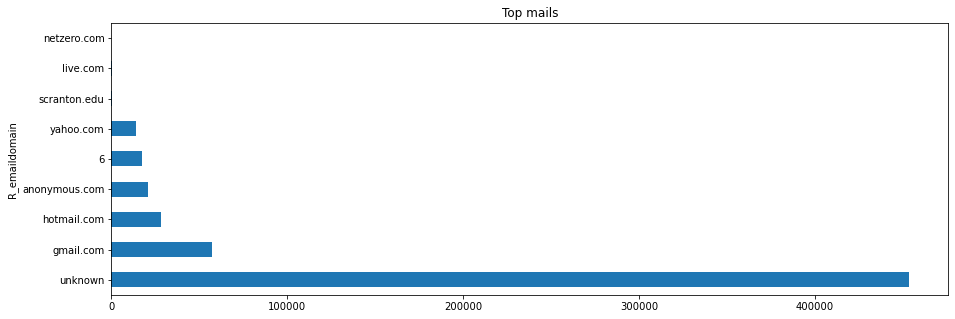

In [60]:
df.groupby('R_emaildomain') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top mails')
plt.show()

In [61]:
# Top 5 to 1,2,3,4,5
df['R_emaildomain'] = df['R_emaildomain'].replace(['unknown'],1)
df['R_emaildomain'] = df['R_emaildomain'].replace(['gmail.com'],2)
df['R_emaildomain'] = df['R_emaildomain'].replace(['hotmail.com'],3)
df['R_emaildomain'] = df['R_emaildomain'].replace(['anonymous.com'],4)
df['R_emaildomain'] = df['R_emaildomain'].replace(['yahoo.com'],5)

In [62]:
df['R_emaildomain'].unique()

array([1, 2, 3, 6, 4, 5, 'scranton.edu', 'live.com', 'netzero.com'],
      dtype=object)

In [63]:
# other emails to 6
df['R_emaildomain'] = df['R_emaildomain'].replace(['outlook.com', 'charter.net', 'prodigy.net.mx',
       'comcast.net', 'live.com.mx', 'icloud.com', 'aol.com',
       'juno.com', 'att.net', 'verizon.net', 'bellsouth.net',
       'servicios-ta.com', 'ymail.com', 'msn.com', 'optonline.net',
       'live.com', 'gmx.de', 'aim.com', 'mail.com', 'me.com', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com',
       'frontiernet.net', 'gmail', 'q.com', 'windstream.net',
       'suddenlink.net', 'ptd.net', 'frontier.com', 'cfl.rr.com',
       'netzero.com', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'],6)   

In [64]:
df['R_emaildomain'].unique()

array([1, 2, 3, 6, 4, 5], dtype=int64)

In [65]:
df['M1'].unique()

array(['T', nan, 'F'], dtype=object)

In [66]:
df['M1'].fillna('unknown',inplace=True)

In [67]:
df['M2'].unique()

array(['T', nan, 'F'], dtype=object)

In [68]:
df['M2'].fillna('unknown',inplace=True)

In [69]:
df['M3'].unique()

array(['T', nan, 'F'], dtype=object)

In [70]:
df['M3'].fillna('unknown',inplace=True)

In [71]:
df['M4'].unique()

array(['M2', 'M0', nan, 'M1'], dtype=object)

In [72]:
df['M4'].fillna('unknown',inplace=True)

In [73]:
df['M5'].unique()

array(['F', 'T', nan], dtype=object)

In [74]:
df['M5'].fillna('unknown',inplace=True)

In [75]:
df['M6'].unique()

array(['T', 'F', nan], dtype=object)

In [76]:
df['M6'].fillna('unknown',inplace=True)

In [77]:
df['M7'].unique()

array([nan, 'F', 'T'], dtype=object)

In [78]:
df['M7'].fillna('unknown',inplace=True)

In [79]:
df['M8'].unique()

array([nan, 'F', 'T'], dtype=object)

In [80]:
df['M8'].fillna('unknown',inplace=True)

In [81]:
df['M9'].unique()

array([nan, 'F', 'T'], dtype=object)

In [82]:
df['M9'].fillna('unknown',inplace=True)

In [83]:
df['ProductCD'] = df['ProductCD'].astype('category')
df['card1'] = df['card1'].astype('category')
df['card2'] = df['card2'].astype('category')
df['card3'] = df['card3'].astype('category')
df['card4'] = df['card4'].astype('category')
df['card5'] = df['card5'].astype('category')  
df['card6'] = df['card6'].astype('category') 
df['addr1'] = df['addr1'].astype('category')
df['addr2'] = df['addr2'].astype('category') 
df['M1'] = df['M1'].astype('category')  
df['M2'] = df['M2'].astype('category')
df['M3'] = df['M3'].astype('category')
df['M4'] = df['M4'].astype('category')
df['M5'] = df['M5'].astype('category')
df['M6'] = df['M6'].astype('category')
df['M7'] = df['M7'].astype('category')
df['M8'] = df['M8'].astype('category')
df['M9'] = df['M9'].astype('category')

In [84]:
cat_columns = df.select_dtypes(['category']).columns

In [85]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [86]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,4,10095,500,42,1,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,4,1372,303,42,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,4,2833,389,42,4,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,4,13341,466,42,2,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,1,2712,413,42,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df = df.fillna(df.median())  # Now fill missing numerical values

In [88]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,4,10095,500,42,1,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,4,1372,303,42,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4,2833,389,42,4,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,4,13341,466,42,2,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,1,2712,413,42,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
import datetime
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
df["Date"] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
df['_Weekdays'] = df['Date'].dt.dayofweek
df['_Hours'] = df['Date'].dt.hour
df['_Days'] = df['Date'].dt.day

In [90]:
df = df.drop(['Date'],axis=1)

In [92]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V333,V334,V335,V336,V337,V338,V339,_Weekdays,_Hours,_Days
0,2987000,0,86400,68.5,4,10095,500,42,1,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,2
1,2987001,0,86401,29.0,4,1372,303,42,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,2
2,2987002,0,86469,59.0,4,2833,389,42,4,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,2
3,2987003,0,86499,50.0,4,13341,466,42,2,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,2
4,2987004,0,86506,50.0,1,2712,413,42,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,2


# Train Identity

In [93]:
file_name2 = os.path.join(DATA_PATH,r'train_identity.csv')
file_name2

'C:\\Users\\YAE WEON SHIM\\CEBD 1260\\train_identity.csv'

In [94]:
df2= pd.read_csv(file_name2)

In [95]:
df2.shape

(144233, 41)

In [96]:
df2.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [97]:
nan_info = pd.DataFrame(df2.isnull().sum()).reset_index()
nan_info.columns = ['feature_name','nan_cnt']
nan_info.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info['nan_percentage'] = nan_info['nan_cnt']/len(df)
nan_info

# The highest nan_percentage is 0.23. We don't need to drop column here.

,feature_name,nan_cnt,nan_percentage
24,id_24,139486,0.236201
25,id_25,139101,0.235549
7,id_07,139078,0.235510
8,id_08,139078,0.235510
21,id_21,139074,0.235503
26,id_26,139070,0.235496
23,id_23,139064,0.235486
27,id_27,139064,0.235486
22,id_22,139064,0.235486
18,id_18,99120,0.167846


In [98]:
df2.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [99]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df2.columns:
        col_type = df2[col].dtypes
        if col_type in numerics:
            c_min = df2[col].min()
            c_max = df2[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df2[col] = df2[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df2[col] = df2[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df2[col] = df2[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df2[col] = df2[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df2[col] = df2[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df2[col] = df2[col].astype(np.float32)
                else:
                    df2[col] = df2[col].astype(np.float64)    
    end_mem = df2.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df2

In [100]:
df2['id_12'].unique()

array(['NotFound', 'Found'], dtype=object)

In [101]:
df2['id_13'].unique()

array([nan, 49., 52., 14., 20., 55., 43., 18., 41., 63., 61., 35., 25.,
       39., 57., 15., 11., 44., 62., 59., 28., 24., 51., 60., 54., 36.,
       38., 31., 56., 58., 22., 50., 32., 45., 48., 23., 30., 17., 13.,
       37., 21., 46., 10., 26., 53., 34., 47., 33., 40., 29., 19., 64.,
       12., 27., 42.])

In [102]:
df2['id_13'].fillna('unknown',inplace=True)
df2['id_13'].unique()

array(['unknown', 49.0, 52.0, 14.0, 20.0, 55.0, 43.0, 18.0, 41.0, 63.0,
       61.0, 35.0, 25.0, 39.0, 57.0, 15.0, 11.0, 44.0, 62.0, 59.0, 28.0,
       24.0, 51.0, 60.0, 54.0, 36.0, 38.0, 31.0, 56.0, 58.0, 22.0, 50.0,
       32.0, 45.0, 48.0, 23.0, 30.0, 17.0, 13.0, 37.0, 21.0, 46.0, 10.0,
       26.0, 53.0, 34.0, 47.0, 33.0, 40.0, 29.0, 19.0, 64.0, 12.0, 27.0,
       42.0], dtype=object)

In [103]:
df2['id_14'].unique()


array([-480., -300.,   nan, -360., -420., -540., -600.,  480., -240.,
        300., -180.,   60.,    0.,  180.,  540.,  600.,  420.,  270.,
        120.,  240.,  330., -120.,  360.,  720., -660., -210.])

In [104]:
df2['id_15'].unique()

array(['New', 'Found', nan, 'Unknown'], dtype=object)

In [105]:
df2['id_15'].fillna('unknown',inplace=True)

In [106]:
df2['id_15'].unique()

array(['New', 'Found', 'unknown', 'Unknown'], dtype=object)

In [107]:
# there are 2 unknown for id_15. Compile. 
df2['id_15'] = df2['id_15'].replace(['Unknown'],'unknown')

In [108]:
df2['id_15'].unique()

array(['New', 'Found', 'unknown'], dtype=object)

In [109]:
df2['id_16'].unique()

array(['NotFound', 'Found', nan], dtype=object)

In [110]:
df2['id_16'].fillna('unknown',inplace=True)
df2['id_16'].unique()

array(['NotFound', 'Found', 'unknown'], dtype=object)

In [111]:
df2['id_17'].unique()

array([166., 121., 225.,  nan, 102., 148., 199., 146., 144., 133., 100.,
       130., 218., 150., 195., 153., 159., 142., 210., 200., 118., 122.,
       149., 189., 192., 136., 124., 191., 212., 183., 111., 143., 152.,
       114., 126., 168., 184., 208., 175., 112., 217., 106., 123., 203.,
       229., 147., 202., 145., 182., 119., 177., 228., 173., 216., 207.,
       137., 141., 107., 205., 162., 213., 157., 219., 138., 116., 135.,
       158., 180., 163., 131., 156., 128., 201., 127., 220., 154., 134.,
       214., 105., 186., 198., 151., 226., 129., 185., 194., 171., 197.,
       117., 164., 178., 160., 120., 161., 155., 190., 140., 211., 101.,
       110., 139., 188., 204., 125., 109.])

In [112]:
df2['id_17'].fillna('unknown',inplace=True)
df2['id_17'].unique()

array([166.0, 121.0, 225.0, 'unknown', 102.0, 148.0, 199.0, 146.0, 144.0,
       133.0, 100.0, 130.0, 218.0, 150.0, 195.0, 153.0, 159.0, 142.0,
       210.0, 200.0, 118.0, 122.0, 149.0, 189.0, 192.0, 136.0, 124.0,
       191.0, 212.0, 183.0, 111.0, 143.0, 152.0, 114.0, 126.0, 168.0,
       184.0, 208.0, 175.0, 112.0, 217.0, 106.0, 123.0, 203.0, 229.0,
       147.0, 202.0, 145.0, 182.0, 119.0, 177.0, 228.0, 173.0, 216.0,
       207.0, 137.0, 141.0, 107.0, 205.0, 162.0, 213.0, 157.0, 219.0,
       138.0, 116.0, 135.0, 158.0, 180.0, 163.0, 131.0, 156.0, 128.0,
       201.0, 127.0, 220.0, 154.0, 134.0, 214.0, 105.0, 186.0, 198.0,
       151.0, 226.0, 129.0, 185.0, 194.0, 171.0, 197.0, 117.0, 164.0,
       178.0, 160.0, 120.0, 161.0, 155.0, 190.0, 140.0, 211.0, 101.0,
       110.0, 139.0, 188.0, 204.0, 125.0, 109.0], dtype=object)

In [113]:
df2['id_18'].fillna('unknown',inplace=True)
df2['id_18'].unique()

array(['unknown', 15.0, 18.0, 13.0, 12.0, 20.0, 21.0, 14.0, 26.0, 24.0,
       17.0, 11.0, 29.0, 16.0, 28.0, 25.0, 23.0, 27.0, 10.0], dtype=object)

In [114]:
df2['id_19'].unique()
df2['id_19'].fillna('unknown',inplace=True)

In [115]:
df2['id_20'].unique()

array([144., 500., 142., 507., 575., 600.,  nan, 533., 333., 549., 566.,
       305., 401., 391., 535., 325., 222., 277., 368., 597., 214., 489.,
       256., 223., 215., 484., 122., 350., 563., 107., 417., 153., 177.,
       146., 638., 561., 394., 278., 565., 181., 272., 611., 568., 266.,
       225., 216., 161., 139., 595., 360., 469., 541., 472., 439., 100.,
       315., 612., 521., 397., 127., 254., 186., 280., 111., 340., 253.,
       337., 299., 501., 358., 404., 514., 430., 178., 192., 321., 324.,
       623., 268., 411., 145., 314., 581., 609., 456., 483., 371., 204.,
       497., 154., 588., 103., 610., 633., 460., 261., 269., 312., 311.,
       242., 527., 384., 193., 347., 335., 270., 310., 359., 556., 191.,
       393., 619., 590., 474., 152., 313., 464., 104., 540., 383., 598.,
       445., 121., 570., 101., 160., 532., 593., 473., 400., 342., 424.,
       320., 426., 119., 499., 552., 620., 511., 387., 444., 185., 415.,
       262., 300., 498., 381., 628., 462., 286., 56

In [116]:
df2['id_20'].fillna('unknown',inplace=True)

In [117]:
df2['id_21'].unique()

array([ nan, 252., 657., 724., 228., 369., 796., 755., 848., 734., 849.,
       596., 672., 255., 457., 164., 409., 130., 680., 510., 621., 817.,
       402., 324., 500., 309., 114., 131., 501., 184., 420., 601., 480.,
       306., 820., 770., 237., 634., 761., 816., 668., 538., 353., 453.,
       166., 123., 488., 853., 537., 437., 802., 525., 332., 197., 739.,
       394., 801., 329., 277., 449., 183., 498., 609., 178., 487., 809.,
       542., 576., 695., 763., 235., 481., 727., 587., 807., 575., 391.,
       208., 691., 253., 327., 558., 530., 194., 317., 591., 519., 728.,
       204., 566., 245., 250., 581., 441., 709., 456., 595., 266., 447.,
       600., 583., 308., 262., 257., 390., 549., 361., 401., 254., 682.,
       748., 367., 109., 236., 219., 256., 673., 286., 814., 106., 459.,
       819., 427., 312., 222., 410., 146., 671., 440., 429., 282., 795.,
       767., 355., 167., 415., 845., 521., 572., 360., 554., 528., 835.,
       446., 185., 299., 577., 145., 189., 231., 24

In [118]:
df2['id_21'].fillna('unknown',inplace=True)

In [119]:
df2['id_22'].unique()

array([nan, 14., 41., 21., 33., 35., 19., 20., 31., 12., 36., 23., 28.,
       40., 24., 39., 22., 43., 26., 44., 10., 17., 38., 37., 18., 42.])

In [120]:
df2['id_22'].fillna('unknown',inplace=True)

In [121]:
df2['id_23'].unique()

array([nan, 'IP_PROXY:TRANSPARENT', 'IP_PROXY:ANONYMOUS',
       'IP_PROXY:HIDDEN'], dtype=object)

In [122]:
df2['id_23'].fillna('unknown',inplace=True)

In [123]:
df2['id_24'].unique()

array([nan, 11., 15., 16., 12., 21., 18., 25., 26., 19., 23., 24., 17.])

In [124]:
df2['id_24'].fillna('unknown',inplace=True)

In [125]:
df2['id_25'].unique()

array([ nan, 321., 161., 460., 426., 205., 268., 509., 132., 516., 485.,
       365., 501., 427., 356., 191., 514., 442., 525., 533., 353., 181.,
       388., 445., 392., 455., 172., 108., 523., 302., 355., 226., 250.,
       359., 102., 349., 458., 119., 126., 242., 170., 239., 471., 375.,
       143., 422., 104., 160., 134., 468., 240., 497., 202., 504., 371.,
       231., 173., 216., 118., 337., 310., 480., 175., 341., 130., 382.,
       325., 405., 312., 236., 286., 276., 500., 193., 496., 381., 404.,
       123., 510., 245., 166., 146., 113., 343., 531., 203., 319., 208.,
       519., 272., 158., 385., 284., 451., 475., 196., 290., 247., 495.,
       417., 190., 133., 307., 366., 436., 110., 486., 545., 209., 238.,
       467., 339., 299., 524., 213., 198., 511., 416., 255., 444., 344.,
       508., 223., 116., 258., 345., 301., 111., 154., 488., 144., 297.,
       512., 443., 254., 184., 373., 306., 141., 498., 183., 155., 251.,
       332., 308., 221., 440., 499., 479., 100., 45

In [126]:
df2['id_25'].fillna('unknown',inplace=True)

In [127]:
df2['id_26'].unique()

array([ nan, 184., 102., 159., 142., 117., 191., 119., 121., 182., 100.,
       216., 147., 146., 133., 206., 161., 215., 169., 152., 143., 163.,
       186., 111., 106., 137., 134., 190., 185., 156., 130., 162., 149.,
       144., 168., 103., 107., 194., 125., 203., 131., 124., 115., 118.,
       199., 122., 150., 138., 170., 126., 187., 129., 177., 174., 114.,
       136., 165., 205., 109., 180., 116., 202., 195., 209., 113., 101.,
       204., 208., 200., 189., 110., 157., 141., 164., 178., 212., 158.,
       127., 128., 214., 167., 123., 201., 108., 211., 160., 155., 153.,
       193., 176., 120., 145., 192., 183., 172., 198.])

In [128]:
df2['id_26'].fillna('unknown',inplace=True)

In [129]:
df2['id_27'].unique()

array([nan, 'Found', 'NotFound'], dtype=object)

In [130]:
df2['id_27'].fillna('unknown',inplace=True)

In [131]:
df2['id_28'].unique()

array(['New', 'Found', nan], dtype=object)

In [132]:
df2['id_28'].fillna('unknown',inplace=True)

In [133]:
df2['id_29'].unique()

array(['NotFound', 'Found', nan], dtype=object)

In [134]:
df2['id_29'].fillna('unknown',inplace=True)

In [135]:
df2['id_30'].unique()

array(['Android 7.0', 'iOS 11.1.2', nan, 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [136]:
df2['id_30'].fillna('unknown',inplace=True)

In [137]:
df2['id_30'] = df2['id_30'].replace(['Android 7.0'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 5.1.1'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 7.1.1'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 6.0'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 8.0.0'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 6.0.1'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 5.0.2'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 4.4.2'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 7.1.2'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 8.1.0'],'Android')
df2['id_30'] = df2['id_30'].replace(['Android 5.0'],'Android')

In [138]:
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_11_6'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_7_5'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12_6'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_13_1'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_9_5'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10.12'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_10_5'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_11_5'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10.9'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10.11'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12_3'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10.13'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12_5'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10.6'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_6_8'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_11_4'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12_1'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_11_3'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12_4'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_13_2'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12_2'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_13_3'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_12_2'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_13_4'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_13_5'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10.10'],'MAC OS')
df2['id_30'] = df2['id_30'].replace(['Mac OS X 10_8_5'],'MAC OS')

In [139]:
df2['id_30'] = df2['id_30'].replace(['iOS 11.1.2'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.0.3'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.1.0'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 10.3.3'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 9.3.5'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 10.3.1'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.1.1'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 10.3.2'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.0.2'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 10.2.0'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 10.2.1'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.0.0'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.0.1'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 10.0.2'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.2.0'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 10.1.1'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.2.1'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.2.5'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.2.2'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.3.0'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.2.6'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.4.0'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.3.1'],'IOS')
df2['id_30'] = df2['id_30'].replace(['iOS 11.4.1'],'IOS')

In [140]:
df2['id_30'] = df2['id_30'].replace(['Windows 10'],'Windows')
df2['id_30'] = df2['id_30'].replace(['Windows 7'],'Windows')
df2['id_30'] = df2['id_30'].replace(['Windows 8.1'],'Windows')
df2['id_30'] = df2['id_30'].replace(['Windows Vista'],'Windows')
df2['id_30'] = df2['id_30'].replace(['Windows XP'],'Windows')
df2['id_30'] = df2['id_30'].replace(['Windows 8'],'Windows')

In [141]:
df2['id_30'].unique()

array(['Android', 'IOS', 'unknown', 'MAC OS', 'Windows', 'Linux', 'func',
       'other'], dtype=object)

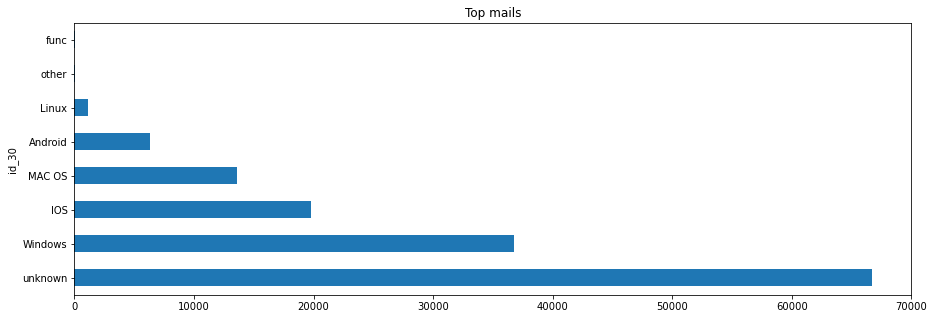

In [142]:
df2.groupby('id_30') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top mails')
plt.show()

In [143]:
# Top 5 to 1,2,3,4, 5 and others to 6
df2['id_30'] = df2['id_30'].replace(['unknown'],1)
df2['id_30'] = df2['id_30'].replace(['Windows'],2)
df2['id_30'] = df2['id_30'].replace(['IOS'],3)
df2['id_30'] = df2['id_30'].replace(['MAC OS'],4)
df2['id_30'] = df2['id_30'].replace(['Android'],5)
df2['id_30'] = df2['id_30'].replace(['Linux','other','func'],6)

In [144]:
df2['id_30'].unique()

array([5, 3, 1, 4, 2, 6], dtype=int64)

In [145]:
df2['id_31'].unique()

array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0', nan,
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [146]:
df2['id_31'] = df2['id_31'].replace(['chrome 62.0','chrome 62.0 for android','chrome 49.0','chrome 61.0',
                                     'chrome 56.0 for android','chrome 54.0 for android','chrome 62.0 for ios',
                                     'chrome 61.0 for android', 'chrome 60.0 for android', 'chrome', 'chrome generic',
                                     'chrome 59.0 for android','chrome 55.0','chrome 55.0 for android', 
                                     'chrome 57.0 for android', 'chrome 56.0', 'chrome 46.0 for android', 'chrome 58.0',
                                     'chrome 59.0', 'chrome 53.0 for android', 'chrome 58.0 for android', 'chrome 60.0',
                                     'chrome 50.0 for android', 'chrome 51.0 for android', 'chrome 63.0',
                                     'chrome 52.0 for android', 'chrome 51.0',  'chrome generic for android',
                                     'chrome 63.0 for android', 'chrome 43.0 for android', 'chrome 63.0 for ios',
                                     'chrome 49.0 for android', 'chrome 64.0 for android', 'chrome 64.0',
                                     'chrome 64.0 for ios', 'chrome 65.0', 'chrome 65.0 for android', 
                                     'chrome 65.0 for ios', 'chrome 66.0','chrome 66.0 for android','google', 
                                     'chrome 66.0 for ios', 'google search application 48.0', 
                                     'google search application 49.0','chrome 67.0', 'chrome 69.0', 'chrome 67.0 for android'
                                     'chrome 57.0','chrome 57.0'],'Chrome')

In [147]:
df2['id_31'] = df2['id_31'].replace(['mobile safari 11.0','mobile safari generic','safari generic',
                                     'mobile safari 10.0','mobile safari 9.0','mobile safari 8.0',
                                     'safari 11.0', 'safari 9.0', 'safari 10.0','mobile safari uiwebview', 'safari'
                                    ],'Safari')

In [148]:
df2['id_31'] = df2['id_31'].replace(['samsung browser 6.2','android webview 4.0','samsung browser 4.0',
                                      'Samsung/SM-G532M','samsung browser 5.4', 'Samsung/SCH', 'Samsung/SM-G531H',
                                     'samsung','samsung browser 5.2','samsung browser generic', 'samsung browser 7.0',
                                      'samsung browser 4.2', 'samsung browser 6.4', 'samsung browser 3.3',
                                      'Generic/Android 7.0','android','Generic/Android','android browser 4.0',
                                     'Generic/Android', 'android browser 4.0'
                                    ],'Samsung')

In [149]:
df2['id_31'] = df2['id_31'].replace(['edge 15.0', 'edge 16.0',
       'edge 14.0','edge 13.0','edge 17.0',],"Microsoft Edge")

In [150]:
df2['id_31'] = df2['id_31'].replace(['firefox 57.0', 'firefox','firefox 56.0', 'firefox 58.0', 'firefox 59.0',
                                     'Mozilla/Firefox', 'firefox 60.0','firefox mobile 61.0','firefox 47.0',
                                     'firefox 52.0', 'firefox 48.0', 'firefox generic','firefox 55.0'
                                    ],"Firefox")

In [151]:
df2['id_31'] = df2['id_31'].replace(['ie 11.0 for desktop', 'ie 11.0 for tablet',
                                    ],"ie")

In [152]:
df2['id_31'] = df2['id_31'].replace(['opera 49.0' ,'opera','opera 51.0','opera 52.0', 'opera 53.0' ],"Opera")

In [153]:
df2['id_31'].unique()

array(['Samsung', 'Safari', 'Chrome', nan, 'Microsoft Edge', 'Firefox',
       'ie', 'other', 'Opera', 'mobile', 'edge', 'aol', 'silk',
       'waterfox', 'Nokia/Lumia', 'puffin', 'Microsoft/Windows',
       'cyberfox', 'opera generic', 'ZTE/Blade', 'palemoon', 'maxthon',
       'line', 'LG/K-200', 'iron', 'BLU/Dash', 'seamonkey', 'M4Tel/M4',
       'comodo', 'Lanix/Ilium', 'chromium', 'Inco/Minion', 'Cherry',
       'icedragon', 'facebook', 'chrome 67.0 for android'], dtype=object)

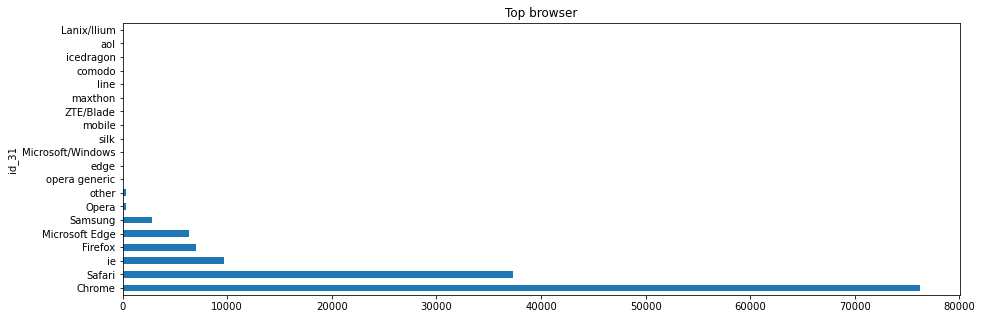

In [154]:
df2.groupby('id_31') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top browser')
plt.show()

In [155]:
# top 5 to 1~5 and others to 6
df2['id_31'] = df2['id_31'].replace(['Chrome'],1)
df2['id_31'] = df2['id_31'].replace(['Safari'],2)
df2['id_31'] = df2['id_31'].replace(['ie'],3)
df2['id_31'] = df2['id_31'].replace(['Firefox'],4)
df2['id_31'] = df2['id_31'].replace(['Microsoft Edge'],5)

In [156]:
df2['id_31'].unique()

array(['Samsung', 2, 1, nan, 5, 4, 3, 'other', 'Opera', 'mobile', 'edge',
       'aol', 'silk', 'waterfox', 'Nokia/Lumia', 'puffin',
       'Microsoft/Windows', 'cyberfox', 'opera generic', 'ZTE/Blade',
       'palemoon', 'maxthon', 'line', 'LG/K-200', 'iron', 'BLU/Dash',
       'seamonkey', 'M4Tel/M4', 'comodo', 'Lanix/Ilium', 'chromium',
       'Inco/Minion', 'Cherry', 'icedragon', 'facebook',
       'chrome 67.0 for android'], dtype=object)

In [157]:
df2['id_31'] = np.where(df2['id_31'].isin([1,2,3,4,5]), df2['id_31'], 6)

In [158]:
df2['id_31'].unique()

array([6, 2, 1, 5, 4, 3], dtype=object)

In [159]:
df2['id_32'].unique()

array([32., nan, 24., 16.,  0.])

In [160]:
df2['id_32'].fillna('unknown',inplace=True)
df2['id_32'].unique()

array([32.0, 'unknown', 24.0, 16.0, 0.0], dtype=object)

In [161]:
df2['id_33'].unique()

array(['2220x1080', '1334x750', nan, '1280x800', '1366x768', '1920x1080',
       '1680x1050', '1136x640', '5120x2880', '2880x1800', '1920x1200',
       '2560x1600', '2048x1536', '1024x768', '1280x720', '2560x1440',
       '2208x1242', '2001x1125', '1440x900', '1600x900', '2672x1440',
       '1280x1024', '960x540', '2732x2048', '2436x1125', '2048x1152',
       '2960x1440', '1024x600', '855x480', '4096x2304', '2160x1440',
       '2562x1442', '801x480', '2736x1824', '3441x1440', '2880x1620',
       '3840x2160', '1638x922', '1280x768', '1360x768', '1280x960',
       '3440x1440', '1152x720', '1280x1025', '3360x2100', '2304x1296',
       '1152x864', '3200x1800', '2112x1188', '2224x1668', '2400x1350',
       '2000x1125', '1600x1000', '2560x1080', '1728x972', '3000x2000',
       '1024x640', '3840x2400', '2304x1440', '1280x600', '1400x1050',
       '1600x1200', '3201x1800', '1356x900', '1344x756', '1624x1080',
       '1536x864', '1800x1125', '1920x1281', '2961x1442', '1366x1024',
       '1344x8

In [162]:
df2['id_33'].fillna('unknown',inplace=True)
df2['id_33'].unique()

array(['2220x1080', '1334x750', 'unknown', '1280x800', '1366x768',
       '1920x1080', '1680x1050', '1136x640', '5120x2880', '2880x1800',
       '1920x1200', '2560x1600', '2048x1536', '1024x768', '1280x720',
       '2560x1440', '2208x1242', '2001x1125', '1440x900', '1600x900',
       '2672x1440', '1280x1024', '960x540', '2732x2048', '2436x1125',
       '2048x1152', '2960x1440', '1024x600', '855x480', '4096x2304',
       '2160x1440', '2562x1442', '801x480', '2736x1824', '3441x1440',
       '2880x1620', '3840x2160', '1638x922', '1280x768', '1360x768',
       '1280x960', '3440x1440', '1152x720', '1280x1025', '3360x2100',
       '2304x1296', '1152x864', '3200x1800', '2112x1188', '2224x1668',
       '2400x1350', '2000x1125', '1600x1000', '2560x1080', '1728x972',
       '3000x2000', '1024x640', '3840x2400', '2304x1440', '1280x600',
       '1400x1050', '1600x1200', '3201x1800', '1356x900', '1344x756',
       '1624x1080', '1536x864', '1800x1125', '1920x1281', '2961x1442',
       '1366x1024', '

In [163]:
df2['id_34'].unique()

array(['match_status:2', 'match_status:1', nan, 'match_status:0',
       'match_status:-1'], dtype=object)

In [164]:
df2['id_34'].fillna('unknown',inplace=True)
df2['id_34'].unique()

array(['match_status:2', 'match_status:1', 'unknown', 'match_status:0',
       'match_status:-1'], dtype=object)

In [165]:
df2['id_35'].unique()

array(['T', 'F', nan], dtype=object)

In [166]:
df2['id_35'].fillna('unknown',inplace=True)
df2['id_35'].unique()

array(['T', 'F', 'unknown'], dtype=object)

In [167]:
df2['id_36'].unique()

array(['F', nan, 'T'], dtype=object)

In [168]:
df2['id_36'].fillna('unknown',inplace=True)
df2['id_36'].unique()

array(['F', 'unknown', 'T'], dtype=object)

In [169]:
df2['id_37'].unique()

array(['T', 'F', nan], dtype=object)

In [170]:
df2['id_37'].fillna('unknown',inplace=True)
df2['id_37'].unique()

array(['T', 'F', 'unknown'], dtype=object)

In [171]:
df2['id_38'].unique()

array(['T', nan, 'F'], dtype=object)

In [172]:
df2['id_38'].fillna('unknown',inplace=True)
df2['id_38'].unique()

array(['T', 'unknown', 'F'], dtype=object)

In [173]:
df2['DeviceInfo'].unique()

array(['SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows', ...,
       'LDN-LX3 Build/HUAWEILDN-LX3', 'Z955A', 'LG-E975'], dtype=object)

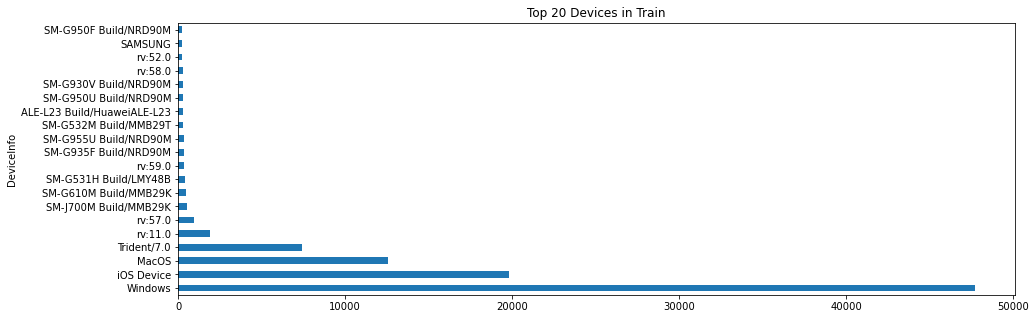

In [174]:
df2.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

In [175]:
df2['device_name'] = df2['DeviceInfo'].str.split('/', expand=True)[0]
df2.loc[df2['DeviceInfo'].str.contains('SM', na=False), 'device_name'] = 'Samsung' 
df2.loc[df2['DeviceInfo'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung' 
df2.loc[df2['DeviceInfo'].str.contains('GT-', na=False), 'device_name'] = 'Samsung' 
df2.loc[df2['DeviceInfo'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola' 
df2.loc[df2['DeviceInfo'].str.contains('Moto', na=False), 'device_name'] = 'Motorola' 
df2.loc[df2['DeviceInfo'].str.contains('moto', na=False), 'device_name'] = 'Motorola' 
df2.loc[df2['DeviceInfo'].str.contains('LG-', na=False), 'device_name'] = 'LG' 
df2.loc[df2['DeviceInfo'].str.contains('rv:', na=False), 'device_name'] = 'RV' 
df2.loc[df2['DeviceInfo'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei' 
df2.loc[df2['DeviceInfo'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei' 
df2.loc[df2['DeviceInfo'].str.contains('-L', na=False), 'device_name'] = 'Huawei' 
df2.loc[df2['DeviceInfo'].str.contains('Blade', na=False), 'device_name'] = 'ZTE' 
df2.loc[df2['DeviceInfo'].str.contains('BLADE', na=False), 'device_name']= 'ZTE' 
df2.loc[df2['DeviceInfo'].str.contains('Linux', na=False), 'device_name'] = 'Linux' 
df2.loc[df2['DeviceInfo'].str.contains('XT', na=False), 'device_name'] = 'Sony' 
df2.loc[df2['DeviceInfo'].str.contains('HTC', na=False), 'device_name'] = 'HTC' 
df2.loc[df2['DeviceInfo'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'
df2.loc[df2.device_name.isin(df2.device_name.value_counts()[df2.device_name.value_counts() < 200].index), 'device_name'] = "Others"

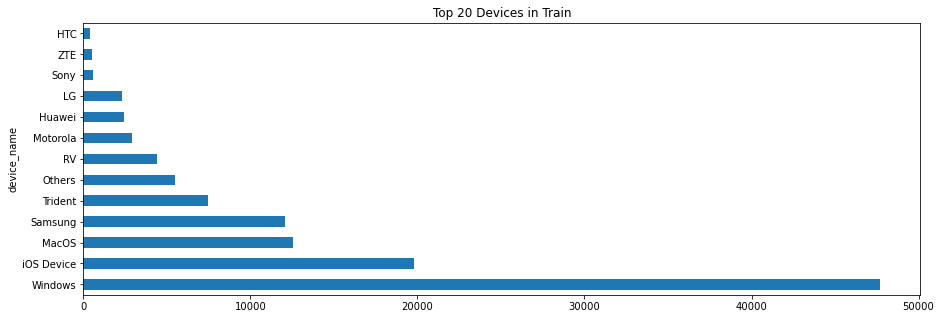

In [176]:
df2.groupby('device_name') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

In [177]:
df2['device_name'].unique()

array(['Samsung', 'iOS Device', 'Windows', nan, 'MacOS', 'ZTE', 'Sony',
       'Others', 'RV', 'LG', 'Trident', 'Huawei', 'Motorola', 'HTC'],
      dtype=object)

In [178]:
# Top 10 to 1~10 and other to 11
df2['device_name'] = df2['device_name'].replace(['Windows'],1)
df2['device_name'] = df2['device_name'].replace(['iOS Device'],2)
df2['device_name'] = df2['device_name'].replace(['MacOS'],3)
df2['device_name'] = df2['device_name'].replace(['Samsung'],4)
df2['device_name'] = df2['device_name'].replace(['Trident'],5)
df2['device_name'] = df2['device_name'].replace(['RV'],6)
df2['device_name'] = df2['device_name'].replace(['Moyotola'],7)
df2['device_name'] = df2['device_name'].replace(['Huawei'],8)
df2['device_name'] = df2['device_name'].replace(['Lg'],9)
df2['device_name'] = df2['device_name'].replace(['Sony'],10)

In [179]:
df2['device_name'] = np.where(df2['device_name'].isin([1,2,3,4,5,6,7,8,9,10]), df2['device_name'], 'Other')

In [180]:
df2['device_name'] = df2['device_name'].replace(['Other'],11)

In [181]:
del df2['DeviceInfo'] # device_name column replaces Device_info col

In [182]:
df2.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,device_name
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,32,2220x1080,match_status:2,T,F,T,T,mobile,4
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,2,32,1334x750,match_status:1,T,F,F,T,mobile,2
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,1,unknown,unknown,unknown,F,F,T,T,desktop,1
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,1,unknown,unknown,unknown,F,F,T,T,desktop,11
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,1,24,1280x800,match_status:2,T,F,T,T,desktop,3


In [183]:
df2['DeviceType'].unique()

array(['mobile', 'desktop', nan], dtype=object)

In [184]:
df2['DeviceType'].fillna('unknown',inplace=True)
df2['DeviceType'].unique()

array(['mobile', 'desktop', 'unknown'], dtype=object)

In [185]:
df2['id_12'] = df2['id_12'].astype('category')
df2['id_13'] = df2['id_13'].astype('category')
df2['id_14'] = df2['id_14'].astype('category')
df2['id_15'] = df2['id_15'].astype('category')
df2['id_16'] = df2['id_16'].astype('category')
df2['id_17'] = df2['id_17'].astype('category')
df2['id_18'] = df2['id_18'].astype('category')
df2['id_19'] = df2['id_19'].astype('category')
df2['id_20'] = df2['id_20'].astype('category')
df2['id_21'] = df2['id_21'].astype('category')
df2['id_22'] = df2['id_22'].astype('category')
df2['id_23'] = df2['id_23'].astype('category')
df2['id_24'] = df2['id_24'].astype('category')
df2['id_25'] = df2['id_25'].astype('category')
df2['id_26'] = df2['id_26'].astype('category')
df2['id_27'] = df2['id_27'].astype('category')
df2['id_28'] = df2['id_28'].astype('category')
df2['id_29'] = df2['id_29'].astype('category')
df2['id_32'] = df2['id_32'].astype('category')
df2['id_33'] = df2['id_33'].astype('category')
df2['id_34'] = df2['id_34'].astype('category')
df2['id_35'] = df2['id_35'].astype('category')
df2['id_36'] = df2['id_36'].astype('category')
df2['id_37'] = df2['id_37'].astype('category')
df2['id_38'] = df2['id_38'].astype('category')
df2['DeviceType'] = df2['DeviceType'].astype('category')


In [186]:
cat_columns = df2.select_dtypes(['category']).columns

In [187]:
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)

In [188]:
df2 = df2.fillna(df2.median()) 

In [189]:
df2.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,device_name
0,2987004,0.0,70787.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,6,3,164,3,1,0,1,1,1,4
1,2987008,-5.0,98945.0,0.0,0.0,0.0,-5.0,14.0,-34.0,0.0,...,2,3,48,2,1,0,0,1,1,2
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,1,4,260,4,0,0,1,1,0,1
3,2987011,-5.0,221832.0,0.0,0.0,0.0,-6.0,14.0,-34.0,0.0,...,1,4,260,4,0,0,1,1,0,11
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,14.0,-34.0,0.0,...,1,2,40,3,1,0,1,1,0,3


In [190]:
print(df['TransactionID'].nunique(), df.shape[0])
print(df2['TransactionID'].nunique(), df2.shape[0])

590540 590540
144233 144233


# Merge two dataframes (Train Transaction & Train Identity)

In [191]:
df = pd.merge(df, df2, on='TransactionID')

In [192]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,device_name
0,2987004,0,86506,50.000,1,2712,413,42,2,2,...,6,3,164,3,1,0,1,1,1,4
1,2987008,0,86535,15.000,1,1412,0,42,4,108,...,2,3,48,2,1,0,0,1,1,2
2,2987010,0,86549,75.887,0,12071,251,11,2,30,...,1,4,260,4,0,0,1,1,0,1
3,2987011,0,86555,16.495,0,2684,274,73,2,106,...,1,4,260,4,0,0,1,1,0,11
4,2987016,0,86620,30.000,1,631,454,42,4,108,...,1,2,40,3,1,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,0,15810802,48.877,0,8606,204,4,2,106,...,1,4,260,4,0,0,1,0,1,11
144229,3577526,1,15810876,250.000,2,172,73,42,4,108,...,1,3,255,3,1,0,1,0,1,11
144230,3577529,0,15810912,73.838,0,3169,454,73,2,33,...,1,4,260,4,0,0,1,0,1,11
144231,3577531,0,15810935,400.000,2,3886,482,42,4,108,...,1,2,183,3,1,0,1,0,0,3


In [193]:
corr_matrix = df[df['isFraud'].notnull()].corr().abs()

In [194]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [193]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

to_drop.remove('TransactionDT')

In [195]:
df_prep = df.drop(columns = to_drop)

NameError: name 'to_drop' is not defined

In [ ]:
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
cols.remove('V107')
df2 = df[cols].sample(frac=0.2)
plt.figure(figsize=(15,15))
sns.heatmap(df2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

In [196]:
df['Trans_min_mean'] = df['TransactionAmt'] - df['TransactionAmt'].mean()
df['Trans_min_std'] = df['Trans_min_mean'] / df['TransactionAmt'].std()

df['TransactionAmt_to_mean_card1'] = df['TransactionAmt'] / \
    df.groupby(['card1'])['TransactionAmt'].transform('mean')
df['TransactionAmt_to_mean_card4'] = df['TransactionAmt'] / \
    df.groupby(['card4'])['TransactionAmt'].transform('mean')
df['TransactionAmt_to_std_card1'] = df['TransactionAmt'] / \
    df.groupby(['card1'])['TransactionAmt'].transform('std')
df['TransactionAmt_to_std_card4'] = df['TransactionAmt'] / \
    df.groupby(['card4'])['TransactionAmt'].transform('std')

In [197]:
df.drop(df[df.TransactionAmt>10000].index, axis=0, inplace=True)

In [197]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_37,id_38,DeviceType,device_name,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,2987004,0,86506,50.000,1,2712,413,42,2,2,...,1,1,1,4,-33.554533,-0.336049,0.606061,0.700202,0.633724,0.566274
1,2987008,0,86535,15.000,1,1412,0,42,4,108,...,0,1,1,2,-68.554533,-0.686573,0.180093,0.185831,0.212693,0.161859
2,2987010,0,86549,75.887,0,12071,251,11,2,30,...,1,1,0,1,-7.667533,-0.076790,1.289521,1.062724,2.636139,0.859456
3,2987011,0,86555,16.495,0,2684,274,73,2,106,...,1,1,0,11,-67.059533,-0.671601,0.417514,0.230996,0.437795,0.186814
4,2987016,0,86620,30.000,1,631,454,42,4,108,...,1,1,0,3,-53.554533,-0.536348,0.692308,0.371663,2.598076,0.323718


# LightGMB

In [198]:
features = [f for f in df.columns if f not in ['TransactionID','isFraud']]
X = df[features]
y = df['isFraud']
X.shape,len(y)

((144233, 439), 144233)

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_recall_fscore_support,classification_report,confusion_matrix
import lightgbm as lgb 

X_train,X_valid, y_train,y_valid = train_test_split(X,y,shuffle=True,random_state=10, test_size=0.1)
print(X_train.shape,X_valid.shape,len(y_train),len(y_valid))

(129809, 439) (14424, 439) 129809 14424


In [200]:
#split out for some test set as if it is future unseen data, using train_test_split for now
X_train,X_test, y_train,y_test = train_test_split(X,y,shuffle=True,random_state=10, test_size=0.1)
print(X_train.shape,X_test.shape,len(y_train),len(y_test))

(129809, 439) (14424, 439) 129809 14424


In [201]:
# we better to reindex the data
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [201]:
model_lgb = lgb.LGBMClassifier(
            n_jobs=4,
            n_estimators=100000,
            boost_from_average='false',
            learning_rate=0.01,
            num_leaves=64,
            num_threads=4,
            max_depth=-1,
            tree_learner = "serial",
            feature_fraction = 0.7,
            bagging_freq = 5,
            bagging_fraction = 0.7,
            min_data_in_leaf=100,
            silent=-1,
            verbose=-1,
            max_bin = 255,
            bagging_seed = 11,
            )

In [202]:
model_lgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric = 'auc', verbose=200, early_stopping_rounds = 300)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] num_threads is set=4, n_jobs=4 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 300 rounds
[200]	training's auc: 0.94537	training's binary_logloss: 0.163848	valid_1's auc: 0.947381	valid_1's binary_logloss: 0.165698
[400]	training's auc: 0.963328	training's binary_logloss: 0.105064	valid_1's auc: 0.961075	valid_1's binary_logloss: 0.109952
[600]	training's auc: 0.975583	training's binary_logloss: 0.0848689	valid_1's auc: 0.970629	valid_1's binary_logloss

LGBMClassifier(bagging_fraction=0.7, bagging_freq=5, bagging_seed=11,
               boost_from_average='false', feature_fraction=0.7,
               learning_rate=0.01, max_bin=255, min_data_in_leaf=100,
               n_estimators=100000, n_jobs=4, num_leaves=64, num_threads=4,
               silent=-1, tree_learner='serial', verbose=-1)

In [449]:
preds = model_lgb.predict(X_valid)

In [450]:
y_valid_lgb = model_lgb.predict_proba(X_valid,num_iteration=model_lgb.best_iteration_)[:,1]

In [451]:
best_f1 = -np.inf
best_thred = 0
v = [i*0.01 for i in range(50)]
for thred in v:
    preds = (y_valid_lgb>thred).astype(int)
    f1 = f1_score(y_valid,preds)
#     print(thred,f1)
    if f1>best_f1:
        best_f1 = f1
        best_thred = thred
print(best_f1,best_thred)

0.8876860622462788 0.27


In [452]:
y_pred_lgb = (y_valid_lgb>best_thred).astype(int)

In [453]:
confusion_matrix(y_valid,y_pred_lgb)

array([[13191,   109],
       [  140,   984]], dtype=int64)

In [454]:
f1_score(y_valid,y_pred_lgb)

0.8876860622462788

In [455]:
print(classification_report(y_valid,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13300
           1       0.90      0.88      0.89      1124

    accuracy                           0.98     14424
   macro avg       0.94      0.93      0.94     14424
weighted avg       0.98      0.98      0.98     14424



In [483]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [476]:
ns_probs = [0 for _ in range(len(y_valid))]

In [477]:
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, y_pred_lgb)

In [478]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.934


In [481]:
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, y_pred_lgb)

Text(0, 0.5, 'True Positive Rate')

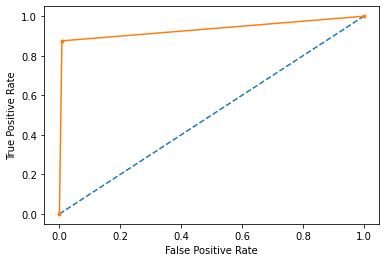

In [485]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# StratifiedKFold

In [202]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.metrics import roc_auc_score
import glob
import lightgbm as lgb # load lightGBM model

In [203]:
features = [f for f in df.columns if f not in ['TransactionID','isFraud','TransactionDT']]
X = df[features]
y = df['isFraud']
X.shape,len(y)

((144233, 438), 144233)

In [204]:
#split out for some test set as if it is future unseen data, using train_test_split for now
X_train,X_test, y_train,y_test = train_test_split(X,y,shuffle=True,random_state=10, test_size=0.1)
print(X_train.shape,X_test.shape,len(y_train),len(y_test))

(129809, 438) (14424, 438) 129809 14424


In [205]:
# we better to reindex the data
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [206]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)

In [207]:
model_lgb = lgb.LGBMClassifier(
            n_jobs=4,
            n_estimators=100000,
            boost_from_average='false',
            learning_rate=0.01,
            num_leaves=64,
            num_threads=4,
            max_depth=-1,
            tree_learner = "serial",
            feature_fraction = 0.7,
            bagging_freq = 5,
            bagging_fraction = 0.7,
            min_data_in_leaf=100,
            silent=-1,
            verbose=-1,
            max_bin = 255,
            bagging_seed = 11,
            )

In [208]:
auc_scores = [] # save auc score for each fold
models = [] #save model for each fold
for i, (train_idx,valid_idx) in enumerate(kf.split(X_train,y_train)):
    
    print('...... training {}th fold \n'.format(i+1))
    tr_X = X_train.loc[train_idx]
    tr_y = y_train.loc[train_idx]
    
    va_X = X_train.loc[valid_idx]
    va_y = y_train.loc[valid_idx]
    
    model = model_lgb # you need to initialize your lgb model at each loop, otherwise it will overwrite
    model.fit(tr_X, tr_y, eval_set=[(tr_X, tr_y), (va_X, va_y)], eval_metric = 'auc', verbose=500, early_stopping_rounds = 300)
    
    # calculate current auc after training the model
    pred_va_y = model.predict_proba(va_X,num_iteration=model_lgb.best_iteration_)[:,1]
    auc = roc_auc_score(va_y,pred_va_y)
    print('current best auc score is:{}'.format(auc))
    auc_scores.append(auc)
    models.append(model)

...... training 1th fold 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] num_threads is set=4, n_jobs=4 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 300 rounds
[500]	training's auc: 0.969392	training's binary_logloss: 0.094519	valid_1's auc: 0.95834	valid_1's binary_logloss: 0.105022
[1000]	training's auc: 0.988407	training's binary_logloss: 0.0636666	valid_1's auc: 0.970783	valid_1's binary_logloss: 0.0859101
[1500]	training's auc: 0.995157	training's binary_logloss: 0.0477864	valid_1's auc: 0.

Training until validation scores don't improve for 300 rounds
[500]	training's auc: 0.968513	training's binary_logloss: 0.094515	valid_1's auc: 0.963066	valid_1's binary_logloss: 0.104739
[1000]	training's auc: 0.987931	training's binary_logloss: 0.0640427	valid_1's auc: 0.974699	valid_1's binary_logloss: 0.0858756
[1500]	training's auc: 0.994764	training's binary_logloss: 0.0482198	valid_1's auc: 0.978414	valid_1's binary_logloss: 0.0782983
[2000]	training's auc: 0.997738	training's binary_logloss: 0.0374668	valid_1's auc: 0.980289	valid_1's binary_logloss: 0.0738636
[2500]	training's auc: 0.999101	training's binary_logloss: 0.0294091	valid_1's auc: 0.981555	valid_1's binary_logloss: 0.0707787
[3000]	training's auc: 0.999676	training's binary_logloss: 0.0232737	valid_1's auc: 0.98233	valid_1's binary_logloss: 0.0689147
[3500]	training's auc: 0.999901	training's binary_logloss: 0.0184506	valid_1's auc: 0.982864	valid_1's binary_logloss: 0.0676034
[4000]	training's auc: 0.999977	trainin

In [209]:
print('the average mean auc is:{}'.format(np.mean(auc_scores)))

the average mean auc is:0.9801141713863342
